<a href="https://colab.research.google.com/github/whispermy/novatus_academia/blob/main/Week4_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AI 노바투스과정**

Week 4: 딥러닝 기초 II (2021-08-27)

실습 #1: 합성곱 신경망 학습 실습하기

## 0. 데이터셋 준비

In [1]:
#keras 라이브러리 가져오기

import tensorflow.keras as keras

In [2]:
#MNIST 패션 데이터 로딩하기

fashion_mnist=keras.datasets.fashion_mnist

In [3]:
(X_train_full, y_train_full), (X_test, y_test) =fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
# 패션 데이터 탐색하기

X_train_full.shape


(60000, 28, 28)

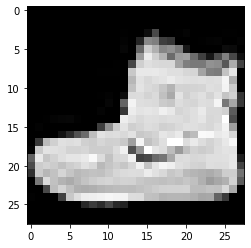

In [5]:
# 28 * 28 차원의 X 를 그림으로 표현하기

import matplotlib.pyplot as plt

plt.imshow(X_train_full[0], cmap="gray")
plt.show()

In [6]:
#target 의 각 숫자값에 해당하는 클래스 명 지정하기

class_names=["T-shirt/top",'Trouser','Pullover','Dress',"Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
# 학습용 데이터를 다시 학습용 데이터와 검증용 데이터 (valdiation set) 으로 분리
# 분리와 동시에 정규화 

X_valid, X_train= X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train= y_train_full[:5000], y_train_full[5000:]

X_test=X_test/255.0

In [9]:
# 이미지의 차원 변경하기
# 28 x 28 -> 28 x 28 x 1 로 명시해주는 작업이다.

import numpy as np

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]


In [10]:
# gpu 설정 
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## 1. 모형 만들기

지난 시간에 한 것:

In [11]:
# keras 의 Sequential API 를 활용하여 완전 접속 신경망 (Fully-Connected Neural Network) 모형의 골격 만들기 

with tf.device('/device:GPU:0'): 
  model=keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape=[28,28]))
  model.add(keras.layers.Dense(300,activation="relu"))

  model.add(keras.layers.Dense(100,activation="relu"))
  model.add(keras.layers.Dense(10,activation="softmax"))

In [13]:
model.summary()

# 784 x 300 + 300 = 235500
# 300 x 100 + 100 = 30100
# 100 x 10 + 10 = 1010

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


합성곱 신경망 모형:

In [14]:
## 합성곱 신경망 모형의 골격

with tf.device('/device:GPU:0'): 
  model=keras.models.Sequential()
  model.add(keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape = [28,28,1]))
  model.add(keras.layers.MaxPooling2D(2))
  model.add(keras.layers.Conv2D(128, 3, activation='relu', padding='same'))
  model.add(keras.layers.Conv2D(128, 3, activation='relu', padding='same'))
  model.add(keras.layers.MaxPooling2D(2))
  model.add(keras.layers.Conv2D(256, 3, activation='relu', padding='same'))
  model.add(keras.layers.Conv2D(256, 3, activation='relu', padding='same'))
  model.add(keras.layers.MaxPooling2D(2))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Dense(64, activation='relu'))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Dense(10, activation='softmax'))
  

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)        

In [16]:
# 모형 컴파일하기 (손실함수, 최적화 방법 지정하기)

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

## 2. 모형 학습하기

In [17]:
#epoch 개수를 10개로 설정하여 모형 학습하기

history=model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 56s 15ms/step - loss: 1.3756 - accuracy: 0.4906 - val_loss: 0.6966 - val_accuracy: 0.7434
Epoch 2/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.8249 - accuracy: 0.6966 - val_loss: 0.5477 - val_accuracy: 0.7886
Epoch 3/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.6721 - accuracy: 0.7533 - val_loss: 0.4810 - val_accuracy: 0.8370
Epoch 4/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.5976 - accuracy: 0.7838 - val_loss: 0.4483 - val_accuracy: 0.8418
Epoch 5/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.5533 - accuracy: 0.8014 - val_loss: 0.3999 - val_accuracy: 0.8522
Epoch 6/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.5148 - accuracy: 0.8202 - val_loss: 0.3687 - val_accuracy: 0.8618
Epoch 7/10
1719/1719 [==============================] - 26s 15ms/step - loss: 0.4797 - accuracy: 0.8323 - val_loss: 0.3953 -

## 3. 학습 결과 확인하기

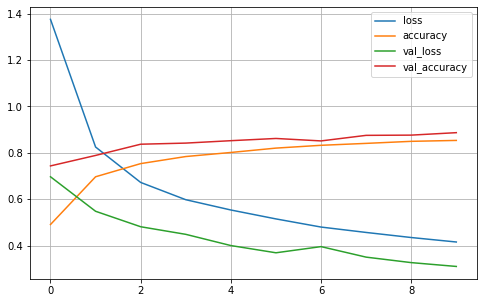

In [18]:
#학습 곡선 그리기

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)

In [19]:
#학습된 모형으로 새로운 그림이 각 범주에 속할 확률 출력하기

X_new=X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [20]:
#학습된 모형으로 새로운 그림의 범주 예측하기

y_pred=y_proba.argmax(axis=1)
y_pred

array([9, 2, 1])

In [21]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [22]:
# 실제 범주와 비교해보기

y_new=y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [23]:
# 테스트용 데이터에서의 정분류율 출력하기

model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.3522 - accuracy: 0.8706


[0.35223388671875, 0.8705999851226807]

## 4. **심화** : ResNet-34 모형 만들고 학습해보기

In [24]:
class ResidualUnit(keras.layers.Layer):
  def __init__(self, filters, strides=1, activation="relu", **kwargs):
    super().__init__(**kwargs)
    self.activation = keras.activations.get(activation)
    self.main_layers = [
      keras.layers.Conv2D(filters, 3, strides=strides, padding="same", use_bias=False),
      keras.layers.BatchNormalization(),
      self.activation,
      keras.layers.Conv2D(filters, 3, strides=1, padding="same", use_bias=False),
      keras.layers.BatchNormalization() ]
    self.skip_layers = []
    if strides > 1:
      self.skip_layers = [
        keras.layers.Conv2D(filters, 1, strides=strides, padding="same", use_bias=False),
        keras.layers.BatchNormalization()]
  def call(self, inputs):
    Z = inputs
    for layer in self.main_layers:
      Z = layer(Z)
    skip_Z = inputs
    for layer in self.skip_layers:
      skip_Z = layer(skip_Z)
    return self.activation(Z + skip_Z)

In [30]:
model= keras.models.Sequential()
model.add(keras.layers.Conv2D(64, 7, strides=2, input_shape=[28, 28, 1], padding="same", use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same"))
prev_filters = 64

for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
  strides = 1 if filters == prev_filters else 2
  model.add(ResidualUnit(filters, strides=strides))
  prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())  # 해당 함수를 지나면 결과가 1줄로 나오기떄문에 flatten이 필요가 없다.
#model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

In [31]:

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 14, 14, 64)        3136      
_________________________________________________________________
batch_normalization_36 (Batc (None, 14, 14, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
residual_unit_16 (ResidualUn (None, 7, 7, 64)          74240     
_________________________________________________________________
residual_unit_17 (ResidualUn (None, 7, 7, 64)          74240     
_________________________________________________________________
residual_unit_18 (ResidualUn (None, 7, 7, 64)         

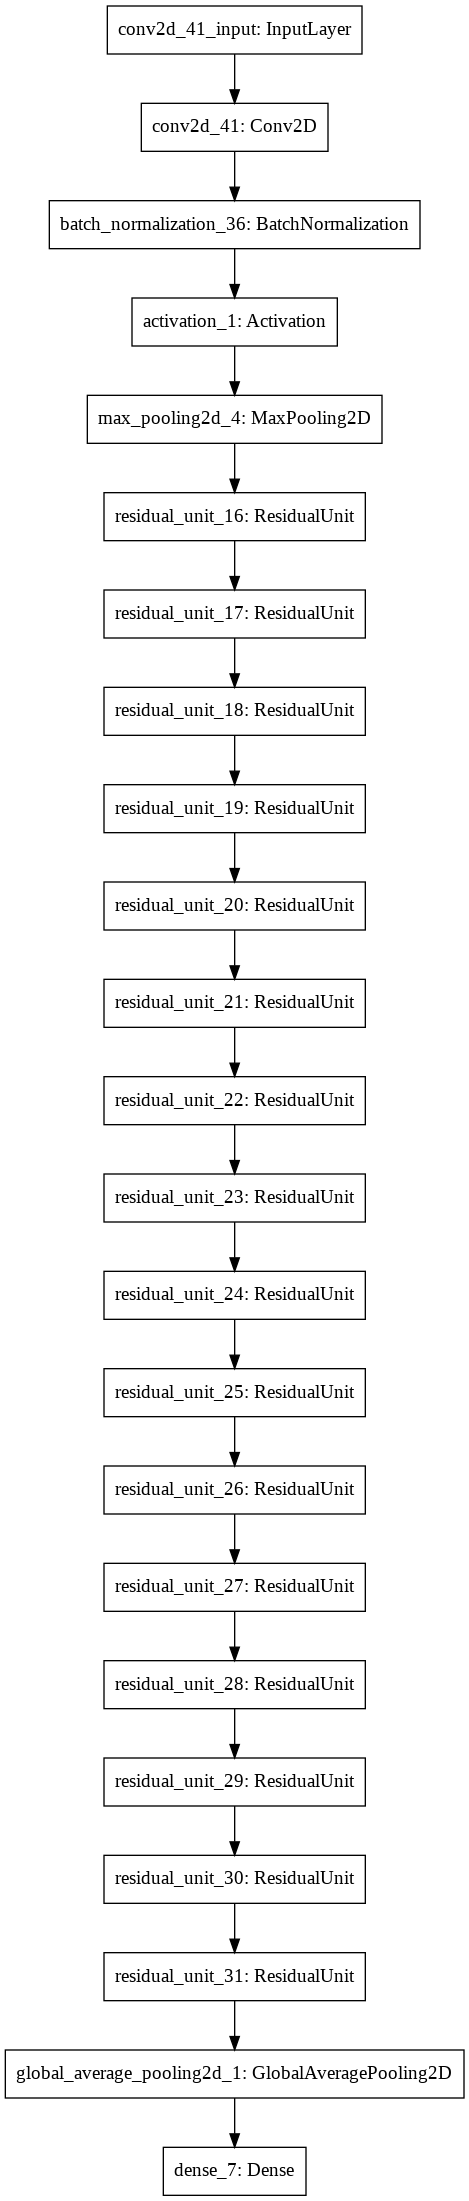

In [32]:
keras.utils.plot_model(model)

In [33]:
# 모형 컴파일하기 (손실함수, 최적화 방법 지정하기)

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [34]:
#epoch 개수를 10개로 설정하여 모형 학습하기

history=model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 130s 74ms/step - loss: 0.5298 - accuracy: 0.8168 - val_loss: 0.3348 - val_accuracy: 0.8756
Epoch 2/10
1719/1719 [==============================] - 127s 74ms/step - loss: 0.3250 - accuracy: 0.8801 - val_loss: 0.3245 - val_accuracy: 0.8834
Epoch 3/10
1719/1719 [==============================] - 126s 74ms/step - loss: 0.2775 - accuracy: 0.8973 - val_loss: 0.2929 - val_accuracy: 0.8886
Epoch 4/10
1535/1719 [=========================>....] - ETA: 13s - loss: 0.2473 - accuracy: 0.9071

KeyboardInterrupt: ignored

## 5. 기 학습된 모델 재사용하기

imagenet 대회에서 학습된 모형들은 [224 X 224 X 3] 형태의 이미지에 적합하므로, [28 X 28 X 1] 이미지에 적용할 수 없음. 이를 위해 다른 이미지를 가져옴.

In [35]:
#이미지 가져오기

from sklearn.datasets import load_sample_image
import numpy as np

china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
images = np.array([china, flower])

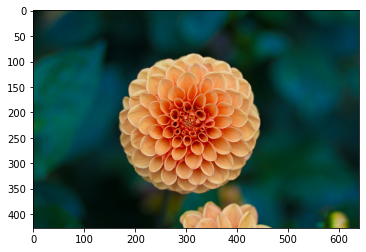

In [38]:
plt.imshow(china)
plt.imshow(flower)

In [39]:
# 이미지의 사이즈를 224 * 224 * 3 으로 변환

import tensorflow as tf

images_resized = tf.image.resize(images, [224, 224])


In [40]:
images_resized[0].shape

TensorShape([224, 224, 3])

In [41]:
#이미지 preprocessing

inputs = keras.applications.resnet50.preprocess_input(images_resized)

In [42]:
# Resnet50 모듈 가져오기 및 모델 설정

import tensorflow.keras.applications.resnet50 as resnet50

model = resnet50.ResNet50(weights="imagenet")   # 이미 학습된 모델 !! 

102981632/102967424 [==============================] - 1s 0us/step


In [43]:
# 기 학습된 모델로 이미지의 라벨 예측하기

Y_proba = model.predict(inputs)
top_K = resnet50.decode_predictions(Y_proba, top=3)

49152/35363 [=========================================] - 0s 0us/step


In [44]:
top_K

[[('n02825657', 'bell_cote', 0.82348657),
  ('n03877845', 'palace', 0.06751671),
  ('n03781244', 'monastery', 0.041883517)],
 [('n03530642', 'honeycomb', 0.49828464),
  ('n13040303', 'stinkhorn', 0.33954793),
  ('n02206856', 'bee', 0.04346391)]]